In [15]:
import serial
import time
from util import arduino_callback
from sciopy import available_serial_ports
from tqdm import tqdm
import numpy as np
import os
from glob import glob
import json
import matplotlib.pyplot as plt

In [16]:
# create directory:
path_idx = len(glob("../data/#*")) + 1

s_path_arduino = f"../data/#{path_idx}/arduino_samples"
print(f"This is measurement #{path_idx}.")

This is measurement #7.


In [17]:
os.mkdir(f"../data/#{path_idx}")
os.mkdir(f"../data/#{path_idx}/arduino_samples")
s_path_arduino = f"../data/#{path_idx}/arduino_samples"
os.mkdir(f"../data/#{path_idx}/eit_raw")

In [18]:
s_path_arduino

'../data/#7/arduino_samples'

In [19]:
config_SALVIA = {
    "T_insp": 1.7,
    "P_insp": 15,
    "Freq": 15,
    "PEEP": 5.0,
    "Rampe": 0.3,
    "saline_lvl": 28,  # cm [empty balloon]
}

with open(f"../data/#{path_idx}/info.json", "w") as outfile:
    json.dump(config_SALVIA, outfile)

In [20]:
# connect arduino

In [8]:
available_serial_ports()

['COM1', 'COM3']

In [9]:
COM_arduino = serial.Serial("COM3", 9600, timeout=1)
time.sleep(2)

In [21]:
d, timestamp, human_time, Δt = arduino_callback(COM_arduino, msgs=False)
print(d, timestamp, human_time, Δt)

6.56 1729753747.566987 2024-10-24 09:09:07,566987 3.009796142578125


In [22]:
start_time = time.time()
ds = list()
for i in range(100):  #  25 fps
    d, timestamp, human_time, Δt = arduino_callback(COM_arduino, msgs=False)
    ds.append(d)
    time.sleep(0.04)
ds = np.array(ds)

elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

'00:00:04'

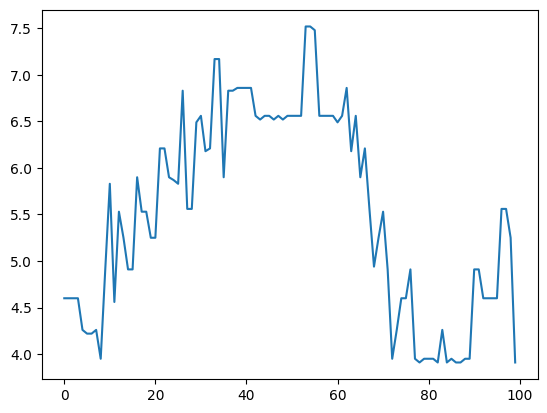

In [23]:
plt.plot(ds)

In [24]:
s_path_arduino

'../data/#7/arduino_samples'

In [25]:
i = 0
while True:
    # for i in range(1_500):  # 30s Messung
    d, timestamp, human_time, Δt = arduino_callback(COM_arduino, msgs=False)
    # print(d)
    np.savez(
        s_path_arduino + "/sample_{0:06d}.npz".format(i),
        d=d,
        timestamp=timestamp,
        human_time=human_time,
        delta_t=Δt,
    )
    time.sleep(0.03)

    i += 1

Connection error...


TypeError: cannot unpack non-iterable NoneType object